In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

2022-11-01 20:21:49.378383: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 20:21:49.747128: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-01 20:21:50.632790: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:/usr/local/cuda-11.2/lib64
2022-11-01 20:21:50.632845: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: 

In [2]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

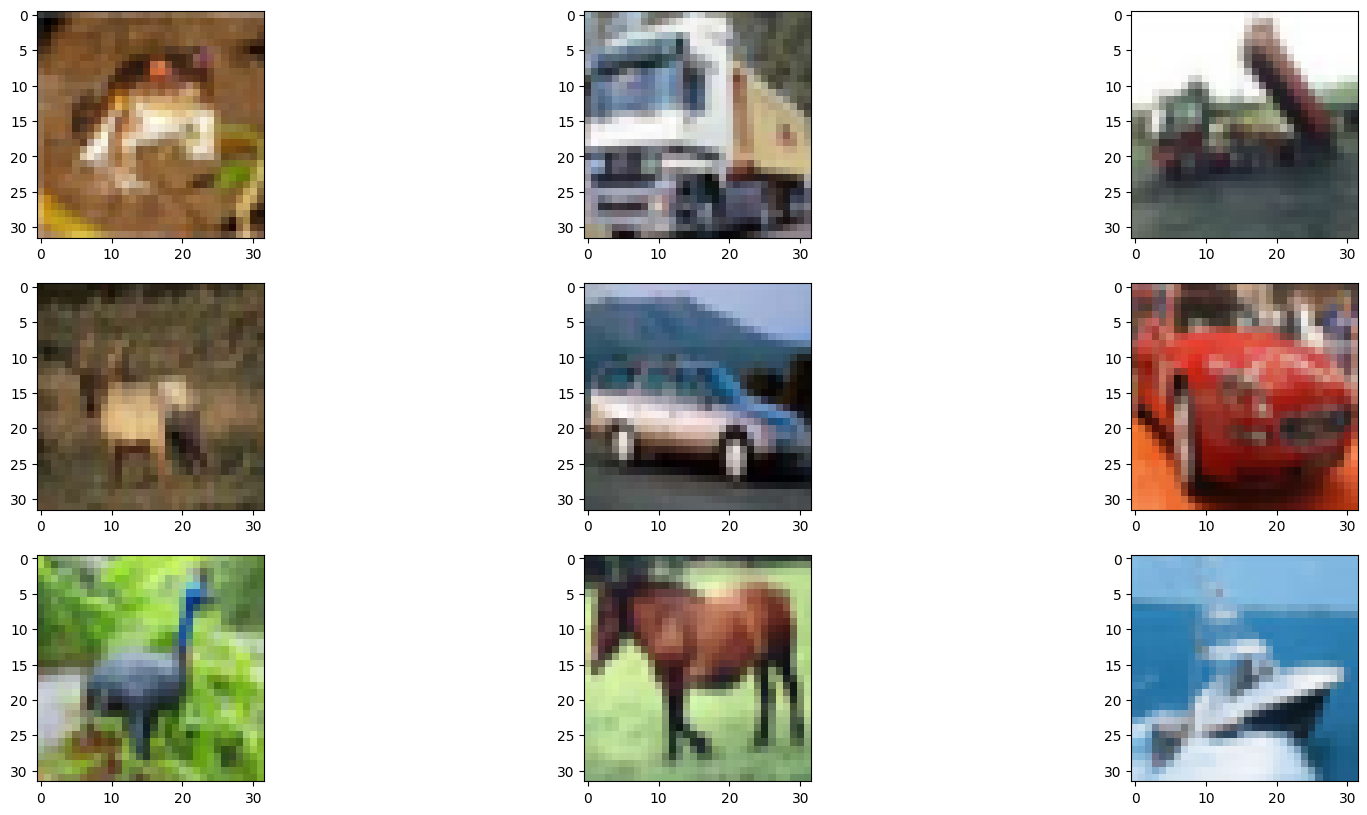

In [3]:
n=9
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i])
plt.show()

In [4]:
print(X_train.shape)

(50000, 32, 32, 3)


In [5]:
import cv2 
X_train_grayscale = np.zeros(X_train.shape[:-1])
for i in range(X_train.shape[0]): 
    X_train_grayscale[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY)
X_train = X_train_grayscale

X_test_grayscale = np.zeros(X_test.shape[:-1])
for i in range(X_test.shape[0]): 
    X_test_grayscale[i] = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2GRAY)
X_test = X_test_grayscale

In [6]:
print(X_train.shape)

(50000, 32, 32)


In [7]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [8]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = "relu", input_shape = (32,32,1),padding = "same"))
model.add(MaxPooling2D((2,2),padding="same"))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2),padding = "same"))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

2022-11-01 20:22:05.473816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-01 20:22:05.500254: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-01 20:22:05.500453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-01 20:22:05.501512: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [9]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer = Adam(),metrics= ['accuracy'])

In [10]:
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_data=[X_test,Y_test])

Epoch 1/50


2022-11-01 20:22:11.107830: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600


1563/1563 [==============================] - 7s 3ms/step - loss: 2.0472 - accuracy: 0.3644 - val_loss: 1.4911 - val_accuracy: 0.4741
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3630 - accuracy: 0.5243 - val_loss: 1.4301 - val_accuracy: 0.5055
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1728 - accuracy: 0.5940 - val_loss: 1.2159 - val_accuracy: 0.5852
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0175 - accuracy: 0.6463 - val_loss: 1.1493 - val_accuracy: 0.6055
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8888 - accuracy: 0.6926 - val_loss: 1.1313 - val_accuracy: 0.6299
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7752 - accuracy: 0.7329 - val_loss: 1.2152 - val_accuracy: 0.6174
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6710 - accuracy: 0.7676 - val_loss: 1.2044 - val_accuracy: 0.6359
Epo

In [13]:
classnames = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [14]:
from keras.utils.image_utils import load_img
image = load_img('data/Thoai_6.jpg', target_size=(32,32),color_mode="grayscale") #,grayscale=True


1/1 [==============================] - 0s 16ms/step
bird


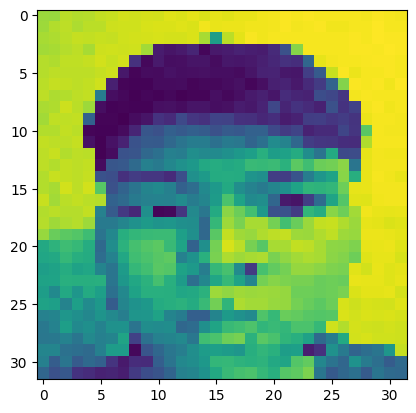

In [16]:
from keras.utils.image_utils import img_to_array
img = img_to_array(image)
img = img.reshape(1,32,32)


tag = np.argmax(model.predict(img),axis=1)
plt.imshow(image)
print(classnames[tag[0]])